# Fonis Datageeks
## Workshop: Intro to Machine Learning: Classification and Regression
### 2. Linearna Regresija
Pripremio: [Dimitrije Milenković](https://www.linkedin.com/in/dimitrijemilenkovicdm/)
<br>dimitrijemilenkovic.dm@gmail.com
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Do sada smo već skapirali da svaki dataframe ima redove i kolone. Redovi su slučajevi, a kolone atributi. Pomenuto je da su problemi nadgledanog učenja oni problemi kod kojih pokušavamo da na osnovu više nezavisnih osobina (atributa, features) predvidimo jednu zavisnu osobinu (target, y). 

Kako bismo bolje objasnili linearnu regresiju, koristićemo dataset sa samo jednom zavisnom osobinom. Logično, takvi modeli se nazivaju modelima jednostruke regresije. 

Dakle, novi dataset sadrži podatke o godinama iskustva i plati radnika:

In [3]:
dataset = pd.read_csv('data/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Probaćemo da na osnovu godine iskustva određenog radnika predvidimo koliko iznosi njegova plata. Dakle, naša pretpostavka je da možemo napraviti funkciju:
$$ f(YearsExperience) = Salary $$
U ovom slučaju `X` i `y` su:

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

Kao što je ranije pomenuto, razlika između klasifikacije i regresije je ta što smo kod regresije predviđali klasu slučaja (tj, kategoriju) dok ovde predviđamo vrednost novog slučaja (kontiualni broj).

In [5]:
y[:10]

array([39343., 46205., 37731., 43525., 39891., 56642., 60150., 54445.,
       64445., 57189.])

Sledeće što treba da uradimo je da podelimo naš dataset na trening i test, to jest izdvojimo jedan podset podataka nad kojima ćemo testirati naučeni model:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

Pre nego da naučimo pomenutu funkciju, pogledajmo naše trening podatke:

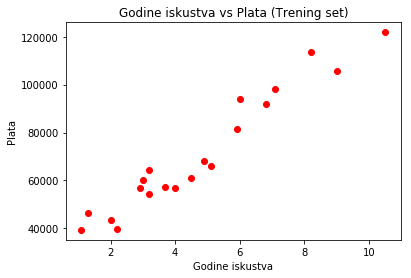

In [7]:
plt.scatter(X_train, y_train, color = 'red')
plt.title('Godine iskustva vs Plata (Trening set)')
plt.xlabel('Godine iskustva')
plt.ylabel('Plata')
plt.show()

Vidimo da postoji određena linearna zavisnosti između godina i plata. Verovatno bismo mogli da povučemo jednu pravu koja bi bila jako blizu ovim tačkicama i koja bi zapravo služila kao njihova aproksimacija.

Upravo, model jednostruke linearne regresije je sledeća funkcija:
$$ y = b0 + b1*x1 $$
Ako posmatramo na raštrkanom grafiku (scatter plot), to je prava koja pokušava da bude što bliža tačkicama iz trening skupa. 

![reg](img/reg.png)

- `Crne tačkice` su naši zapisi iz trening seta, izmerene vrednosti x i y. 
- `Plava linija` je ono što zapravo treba da naučimo, naš model, odnosno ranije pomenuta funkcija. To je linija koja minimizuje sumu kvadrata rastojanja tačkica od nje. 
- `Crvene linije` su greške, vertikalna odstojanja od izmerenih stvarnih vrednost i linije na kojoj su predviđene vrednosti.
- Nagib plave linije je `b1`
- Presek plave linije i y ose je `b0`.

Primenjivanje regresije znači *učenje b0 i b1 tako da greške (crvene linije) budu što manja*.

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Možemo prepoznati isti redosled koraka pri izgradnji modela kao kod klasifikacije:
1. Podelili smo dataset na trening i test
2. Importovali smo klasu modela koji koristimo
3. Inicijalizovali smo model (i opciono, podesili parametre)
4. Prilagodili smo model našim trening podacima (`fit`)

i sada treba:
5. Pomoću izgrađenog modela, predvideti rezultate za test podatke

In [9]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

Probajmo dalje da:
5. Vizualizovati rezultate modela, nad trening i test skupom:

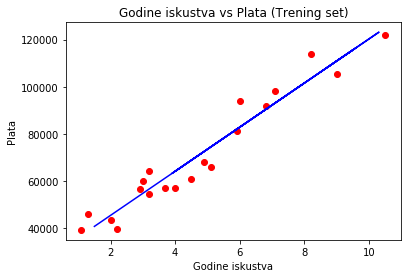

In [10]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Godine iskustva vs Plata (Trening set)')
plt.xlabel('Godine iskustva')
plt.ylabel('Plata')
plt.show()

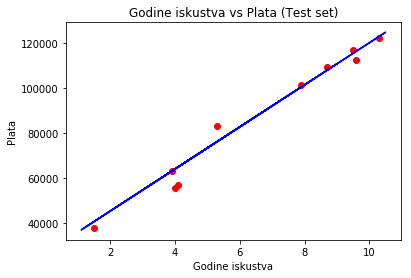

In [11]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Godine iskustva vs Plata (Test set)')
plt.xlabel('Godine iskustva')
plt.ylabel('Plata')
plt.show()

Naravno, možemo pogledati koje vrednosti parametra je model naučio:

In [12]:
b0, b1 = regressor.intercept_, regressor.coef_
b0, b1 

(26816.192244031183, array([9345.94244312]))

Dakle, naš model, kada predviđa, zapravo računa sledeću vrednost:

In [13]:
b0 + b1 * X_test[0]

array([40835.10590871])

Upravo, to je isti broj kao i predviđeni:

In [14]:
y_pred[0]

40835.105908714744

Dok se stvarni malo razlikuje:

In [15]:
y_test[0]

37731.0

Zapravo, pri predviđanju godišnje plate za prvu osobu iz test skupa, pogrešili smo za 3104 dolara. Na mesečnom nivou, to je 250 dolara. Izgleda da smo dobri :)

In [16]:
y_pred[0] - y_test[0]

3104.105908714744

Naravno, kada izgradimo model, potrebno je:
6. Evaluirati rezultate modela, poređem predviđenih i stvarnih razultata test skupa 

Postoji veliki broj različitih mera evaluacije regresionih modela. Mi ćemo ovde pomenuti najbitnije. Prva je **srednja kvadratna greška** (mean squared error):
$$  MSE = (1/n) * \sum_{n}((y_t - y_p)^2) $$
Gde `yt` predstavlja y_test, a `yp` y_pred, a `n` broj uzoroka u test skupu:

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred) # MSE = (1/n) * sum((y_test - y_pred)^2)
mse

21026037.329511296

Međutim, opisnija mera je **root-mean squared error** na osnovu koje možemo da vidimo koliko su tačkice blizu do predviđene linije:

In [18]:
np.sqrt(mse) 

4585.4157204675885

Takođe, još jedan veoma bitna mera je **R-squared**:
$$ R^2 = 1 - \frac{MSE}{var(y_t)} = 1 - \frac{\sum_{n}((y_t - y_p)^2)}{\sum_{n}((y_t - y\hat{})^2)}  $$

Ova mera zapravo predstavlja odnos varijacije u predviđenim razultatima i same varijacije target osobine. R-squared se interpretira kao *koliko procenta devijacije target osobine je opisano devijacijom feature osobina*:

In [19]:
regressor.score(X_test,y_test) # R-squared = 1 - (MSE / var(Y_test)) 

0.9749154407708353

## Višestruka linearna regresija

In [20]:
startups = pd.read_csv('data/50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
X = startups.iloc[:, :3].values
y = startups.iloc[:, 4].values
X[:5, :]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
regressor.intercept_

42989.00816508671

In [26]:
regressor.coef_ # interpretiraj, povecanje cega ce najvise uzrokovati povecanje profita?

array([0.77884104, 0.0293919 , 0.03471025])

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred) # MSE = (1/n) * sum((y_test - y_pred)^2)
np.sqrt(mse)

8803.775790469348

In [28]:
regressor.score(X_test,y_test) # R-squared = 1 - (MSE / var(Y_test)) 

0.939395591782057

Izbacili smo State. Zašto smo to uradili? Da li on utiče na profit?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f018fb4cbe0>,
      dtype=object)

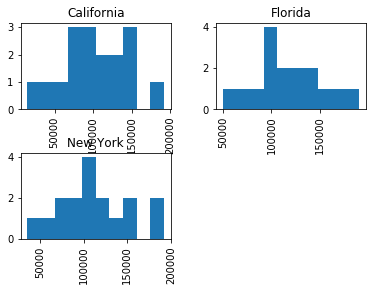

In [29]:
startups['Profit'].hist(by=startups['State'])

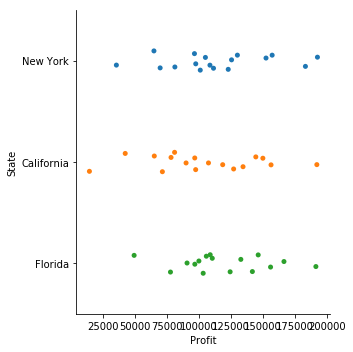

In [30]:
sns.catplot(x='Profit', y='State', data=startups)

Izgleda da State ne utiče baš na profit. U slučaju da ne možemo da izvučemo paterne ponašanja, takav atribut nam može više smetati nego koristiti (algoritam može zaključiti pogrešno i tako možemo smanjiti tačnost). Ipak možemo probati da uključimo i taj atribut da vidimo kakvu tačnost ćemo dobiti. 

In [31]:
X = startups.iloc[:, :4].values
y = startups.iloc[:, -1].values
X[:5, :]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [32]:
states = startups.State.value_counts().index.values
states

array(['New York', 'California', 'Florida'], dtype=object)

In [33]:
# Enkodiranje kategoricke varijable, guglaj!
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X[:10, 3]

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0], dtype=object)

Međutim, sada su ovo brojevi koji imaju redosled, dok su gradovi nominalne kategorije. Algoritam će nam se zbuniti, kako da ga spasimo.

OneHotEncoder -- prisustvo ili odsustvo određene osobine.

In [28]:
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
X[0, :]

/home/dimi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([0.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
       1.368978e+05, 4.717841e+05])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
regressor.score(X_test,y_test) # R-squared = 1 - (MSE / var(Y_test)) 

0.9347068473282223